In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df1 = pd.read_csv(r"C:\Users\ASUS\Downloads\archive (5)\Mumbai.csv")
df1.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [4]:
df1.shape

(7719, 40)

In [5]:
df1.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [7]:
df2=df1.drop(['Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', "Children'splayarea", 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'], axis ='columns')
df2.head()

,Price,Area,Location,No. of Bedrooms
0,4850000,720,Kharghar,1
1,4500000,600,Kharghar,1
2,6700000,650,Kharghar,1
3,4500000,650,Kharghar,1
4,5000000,665,Kharghar,1


In [8]:
df2.isnull().sum()

Price              0
Area               0
Location           0
No. of Bedrooms    0
dtype: int64

In [9]:
df2['BHK'] = df2['No. of Bedrooms'].apply(lambda x: int (x))
df2.head()

,Price,Area,Location,No. of Bedrooms,BHK
0,4850000,720,Kharghar,1,1
1,4500000,600,Kharghar,1,1
2,6700000,650,Kharghar,1,1
3,4500000,650,Kharghar,1,1
4,5000000,665,Kharghar,1,1


In [10]:
df2['Total_price'] = df2.Price/100000
df2.head()

,Price,Area,Location,No. of Bedrooms,BHK,Total_price
0,4850000,720,Kharghar,1,1,48.5
1,4500000,600,Kharghar,1,1,45.0
2,6700000,650,Kharghar,1,1,67.0
3,4500000,650,Kharghar,1,1,45.0
4,5000000,665,Kharghar,1,1,50.0


In [13]:
df3=df2.drop(['Price','No. of Bedrooms'], axis='columns')
df3.head()

,Area,Location,BHK,Total_price
0,720,Kharghar,1,48.5
1,600,Kharghar,1,45.0
2,650,Kharghar,1,67.0
3,650,Kharghar,1,45.0
4,665,Kharghar,1,50.0


In [14]:
df3.Location = df3.Location.apply(lambda x: x.strip())
Location_stats = df3['Location'].value_counts(ascending=False)
Location_stats

Kharghar               681
Thane West             577
Mira Road East         481
Ulwe                   391
Nala Sopara            225
                      ... 
Sea Face                 1
Shiv Sagar Estate        1
Kulupwadi                1
Off Nepean Sea Road      1
Padle Gaon               1
Name: Location, Length: 413, dtype: int64

In [15]:
Location_stats.values.sum()

7719

In [22]:
len(Location_stats[Location_stats>2])

205

In [19]:
len(Location_stats)

413

In [24]:
Location_stats_less_than_2 = Location_stats[Location_stats<=2]
Location_stats_less_than_2

Sector-35 Kamothe      2
Saki Naka              2
MHADA Colony 20        2
Vikhroli West          2
Tolaram Colony         2
                      ..
Sea Face               1
Shiv Sagar Estate      1
Kulupwadi              1
Off Nepean Sea Road    1
Padle Gaon             1
Name: Location, Length: 208, dtype: int64

In [25]:
len(df3.Location.unique())

413

In [28]:
df3.Location = df3.Location.apply(lambda x: 'other' if x in Location_stats_less_than_2 else x)
len(df3.Location.unique())

206

In [29]:
df3.head()

,Area,Location,BHK,Total_price
0,720,Kharghar,1,48.5
1,600,Kharghar,1,45.0
2,650,Kharghar,1,67.0
3,650,Kharghar,1,45.0
4,665,Kharghar,1,50.0


In [40]:
df3[df3.Area/df3.BHK<250].head()

,Area,Location,BHK,Total_price
1271,245,Mira Road East,1,21.00000
1400,400,mumbai,2,35.00000
1661,441,Jawahar Nagar,2,88.00000
2450,245,Mira Road East,1,79.59999
2512,220,Mira Road East,1,83.00000


In [41]:
df4=df3[~(df3.Area/df3.BHK<250)]
df4.shape

(7663, 4)

In [43]:
df5=df4.copy()
df5.head()

,Area,Location,BHK,Total_price
0,720,Kharghar,1,48.5
1,600,Kharghar,1,45.0
2,650,Kharghar,1,67.0
3,650,Kharghar,1,45.0
4,665,Kharghar,1,50.0


In [45]:
df5['price_per_sqft']=df5['Total_price']*100000/df5['Area']
df5.head()

,Area,Location,BHK,Total_price,price_per_sqft
0,720,Kharghar,1,48.5,6736.111111
1,600,Kharghar,1,45.0,7500.000000
2,650,Kharghar,1,67.0,10307.692308
3,650,Kharghar,1,45.0,6923.076923
4,665,Kharghar,1,50.0,7518.796992


In [46]:
df5.price_per_sqft.describe()

count      7663.000000
mean      16144.092075
std       19602.755817
min         460.526316
25%        6454.152908
50%       10357.142857
75%       18620.689655
max      400000.000000
Name: price_per_sqft, dtype: float64

In [48]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(6621, 5)

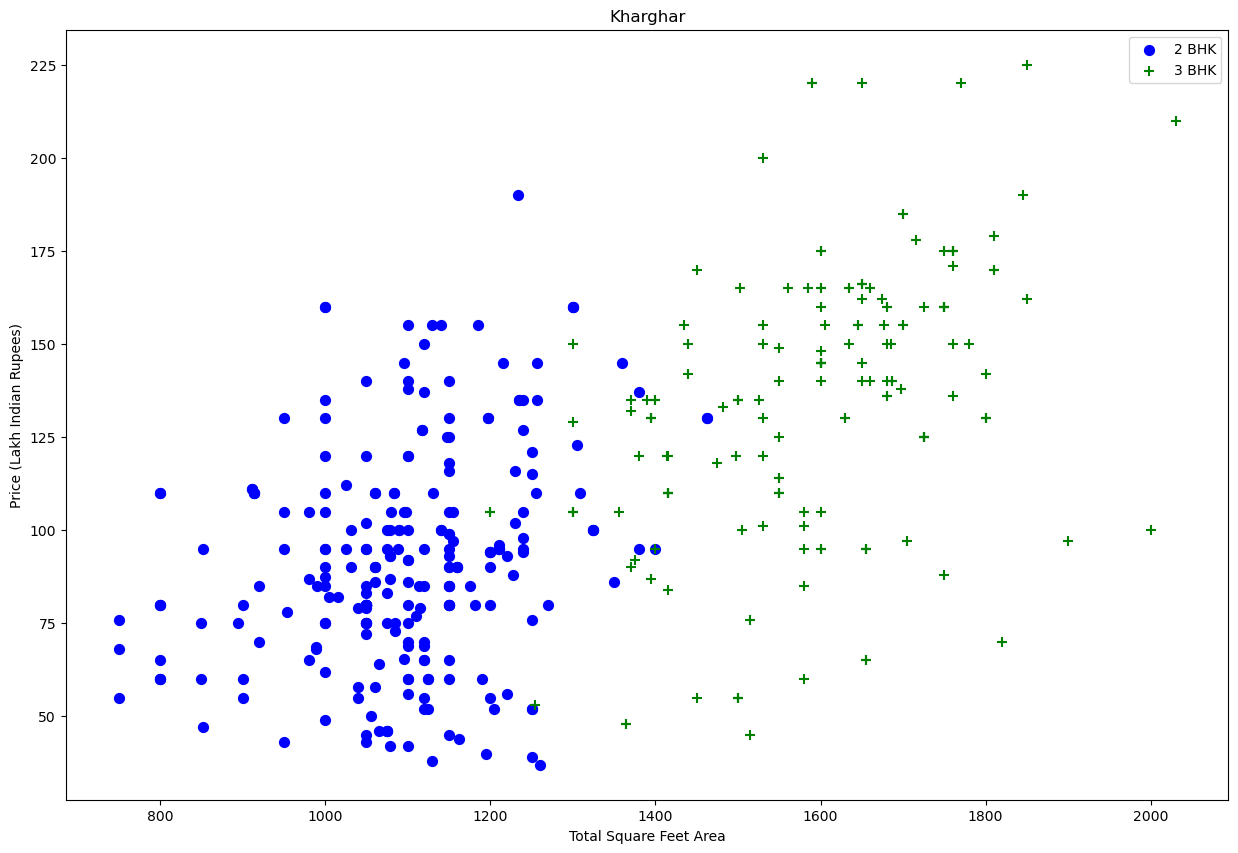

In [51]:
def plot_scatter_chart(df,Location):
    bhk2 = df[(df.Location==Location) & (df.BHK==2)]
    bhk3 = df[(df.Location==Location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.Area,bhk2.Total_price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.Area,bhk3.Total_price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(Location)
    plt.legend()
    
plot_scatter_chart(df6,"Kharghar")

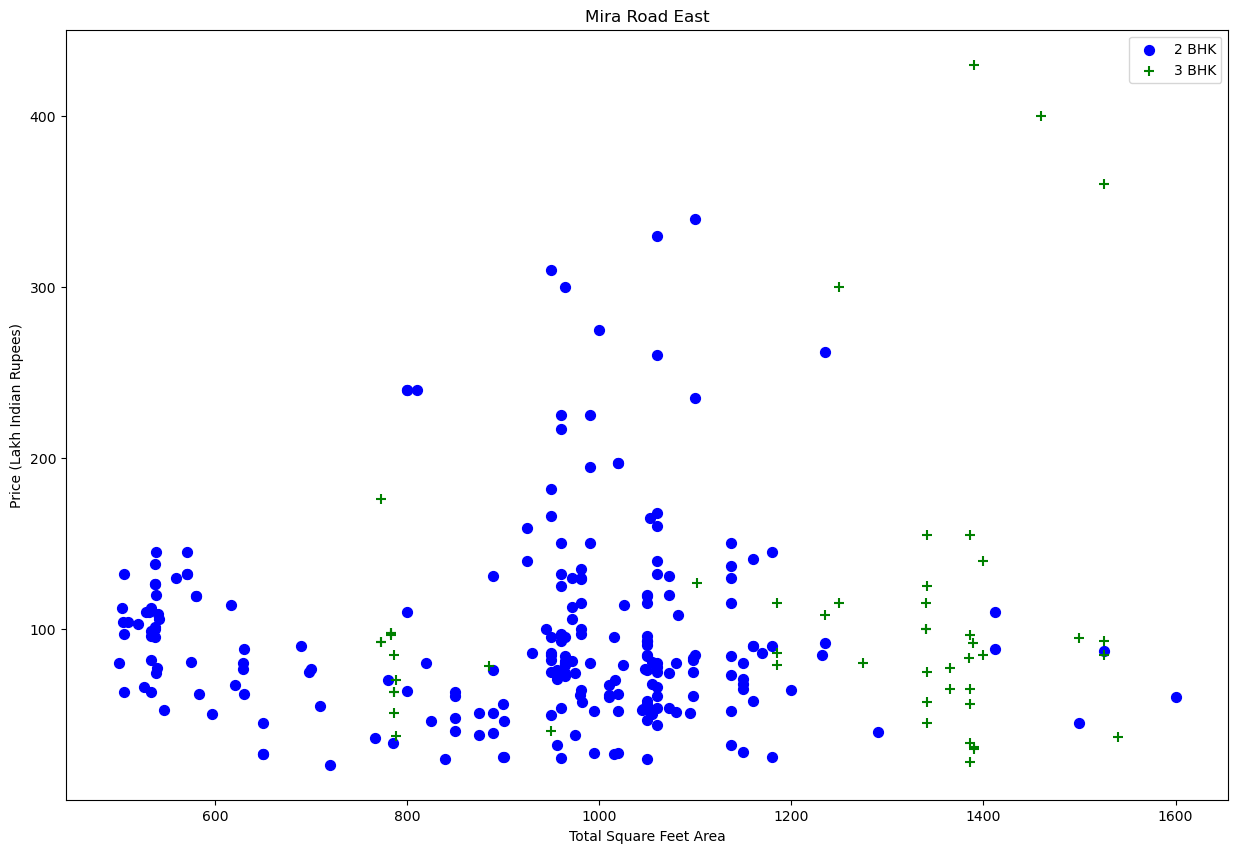

In [52]:
plot_scatter_chart(df6,"Mira Road East")

In [53]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for Location, Location_df in df.groupby('Location'):
        BHK_stats = {}
        for BHK, BHK_df in Location_df.groupby('BHK'):
            BHK_stats[BHK] = {
                'mean': np.mean(BHK_df.price_per_sqft),
                'std': np.std(BHK_df.price_per_sqft),
                'count': BHK_df.shape[0]
            }
        for BHK, BHK_df in Location_df.groupby('BHK'):
            stats = BHK_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, BHK_df[BHK_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(4198, 5)

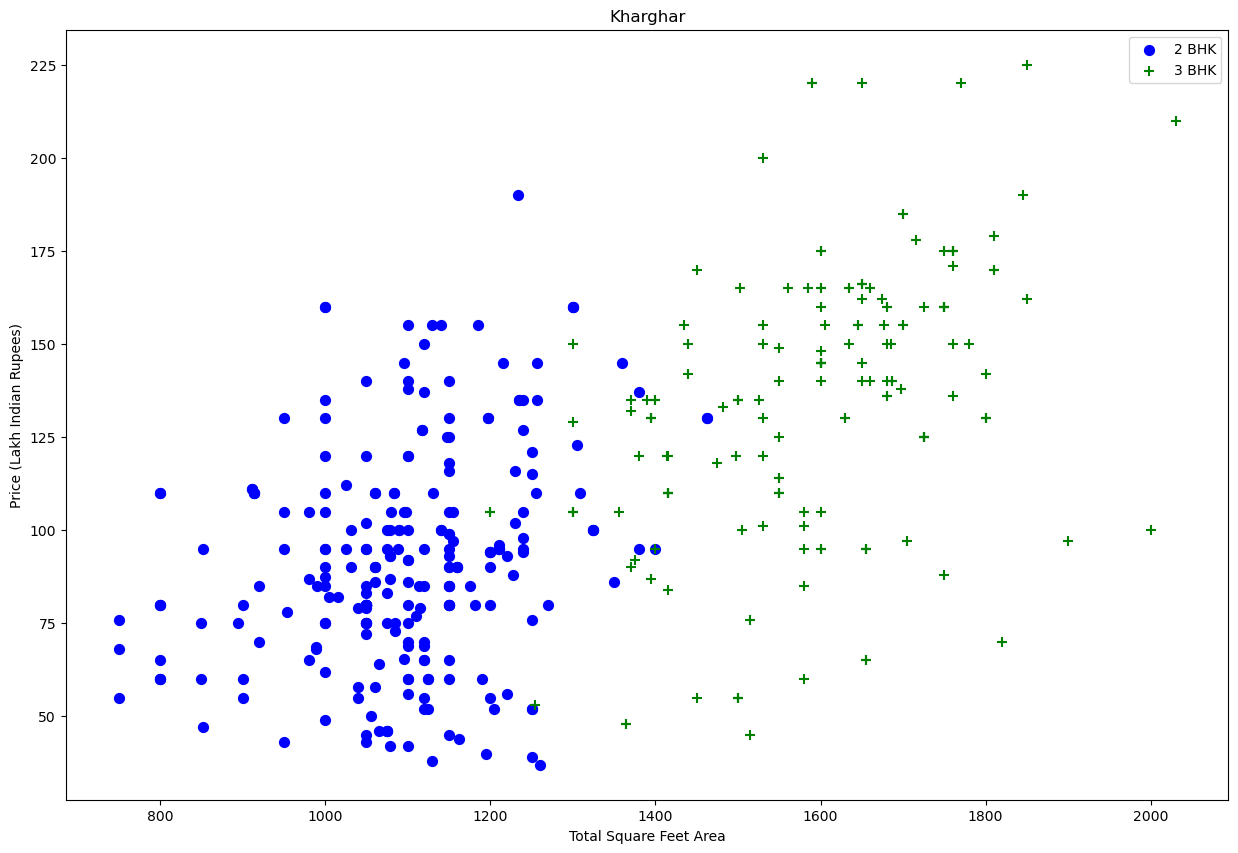

In [54]:
plot_scatter_chart(df6,"Kharghar")

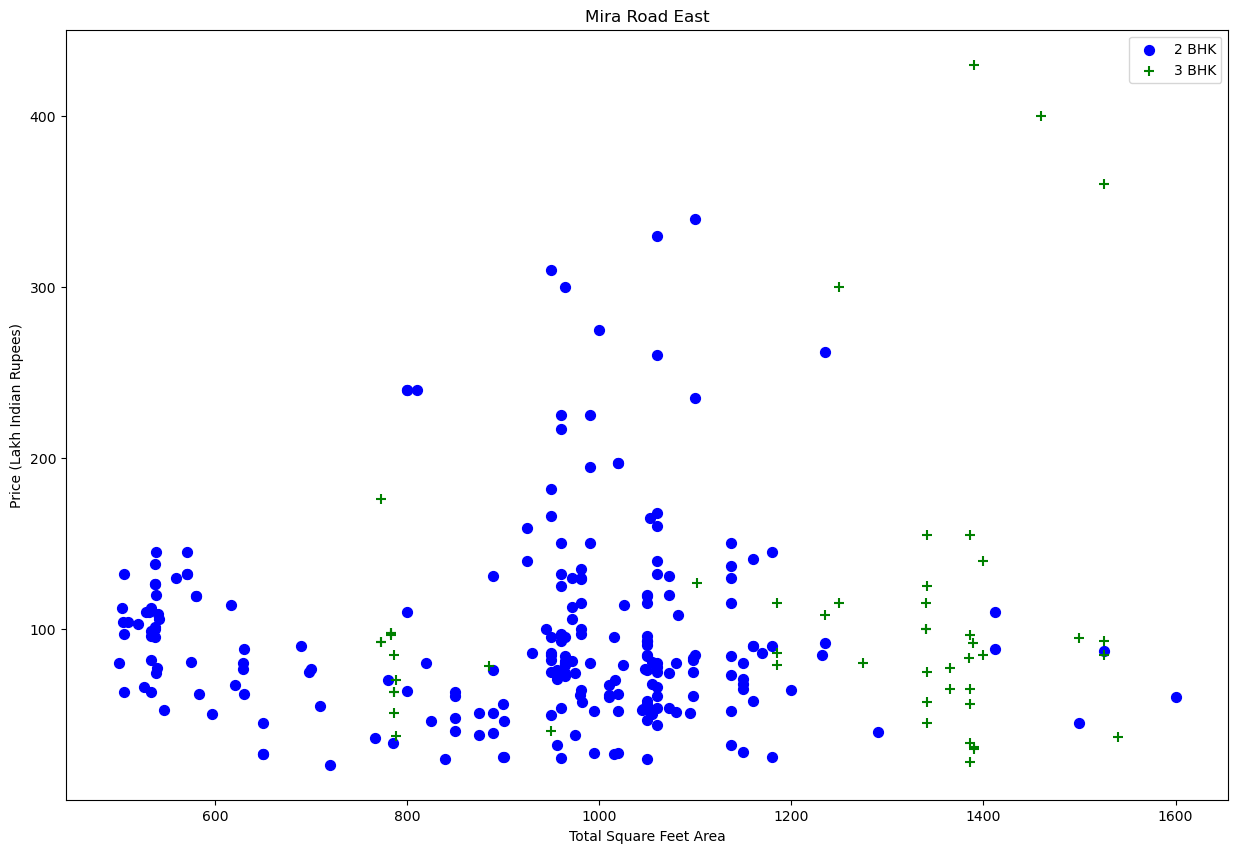

In [55]:
plot_scatter_chart(df6,"Mira Road East")

Text(0, 0.5, 'Count')

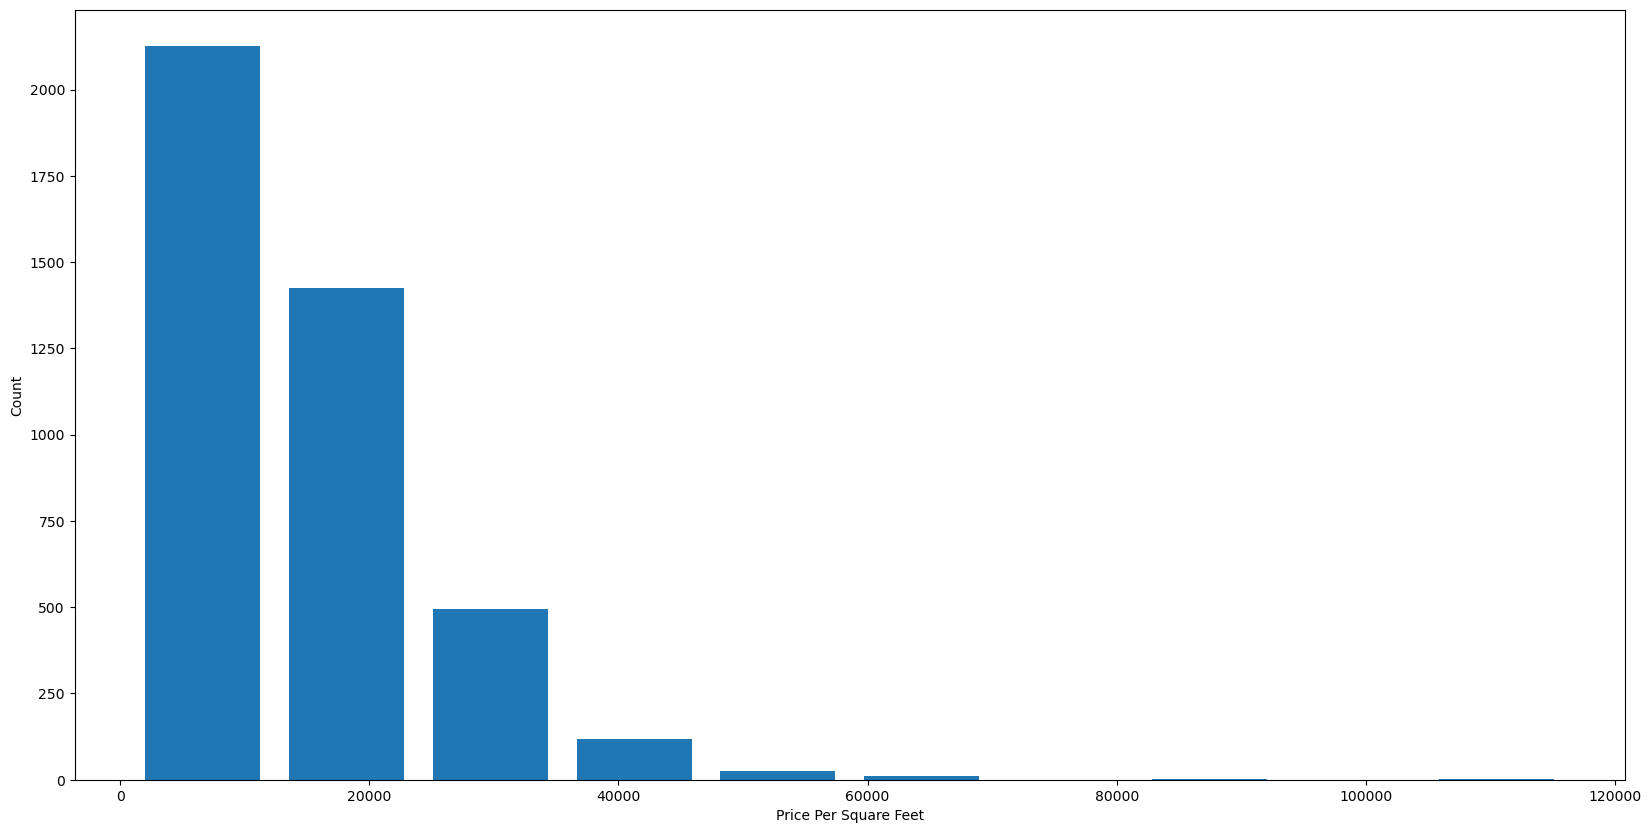

In [56]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

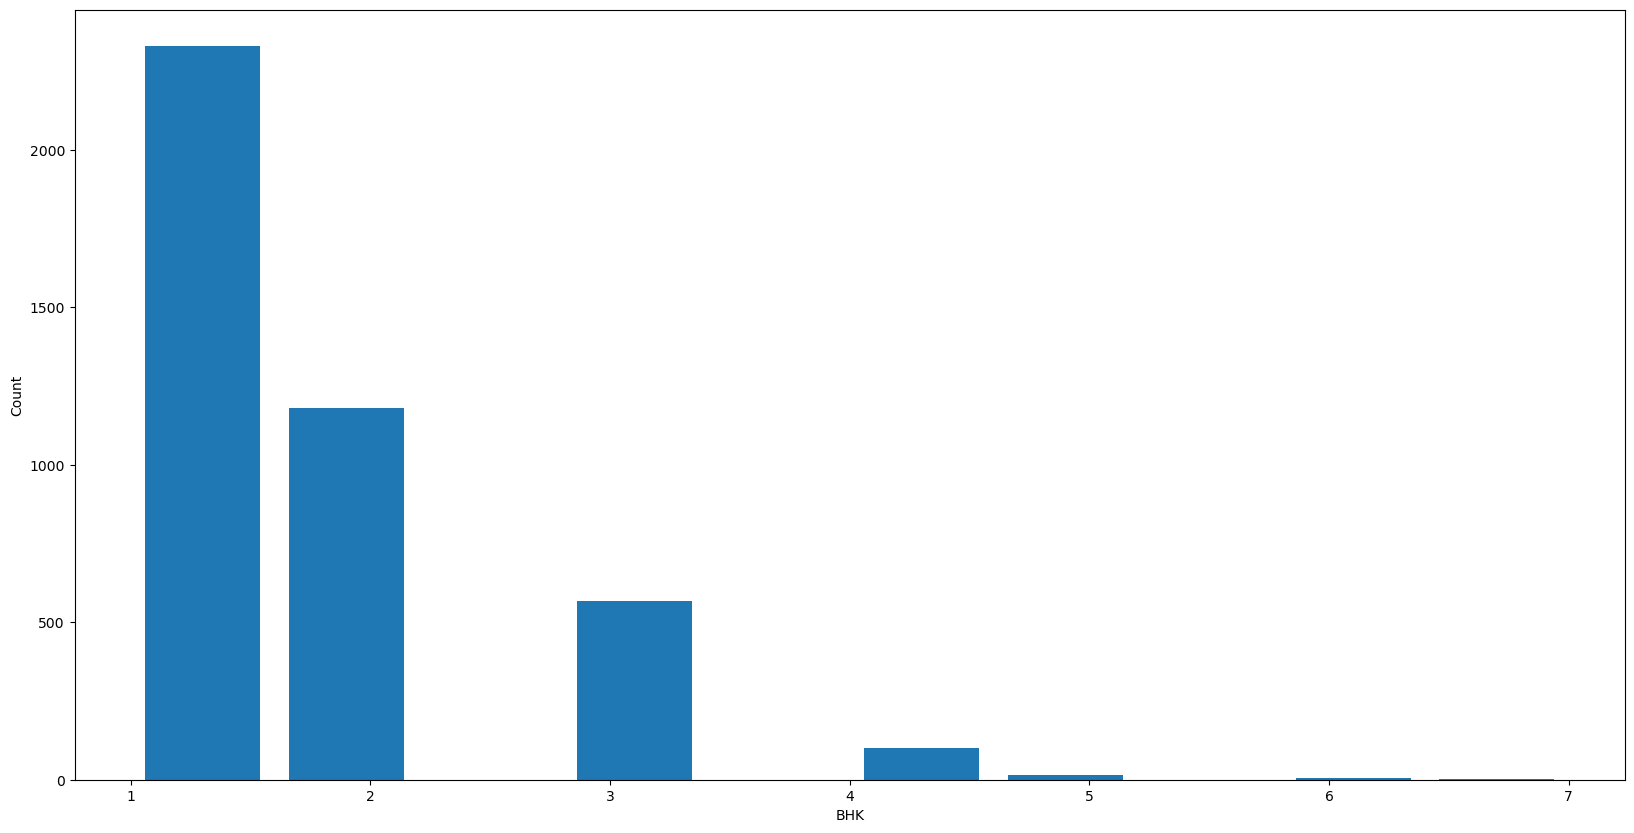

In [59]:
plt.hist(df7.BHK,rwidth=0.8)
plt.xlabel("BHK")
plt.ylabel("Count")

In [62]:
df8=df7.drop(['price_per_sqft'],axis='columns')
df8.head()

,Area,Location,BHK,Total_price
0,1350,4 Bunglows,2,250.0
1,1350,4 Bunglows,2,250.0
2,400,Airoli,1,62.0
4,1245,Airoli,2,149.0
5,1183,Airoli,2,140.0


In [63]:
dummies=pd.get_dummies(df8.Location)
dummies.head(3)

,4 Bunglows,Airoli,Ambarnath,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,Anjurdive,Antop Hill,...,kavesar,kolshet,matunga east,mumbai,other,roadpali navimumbai,taloja panchanand,thakur village kandivali east,vasant vihar thane west,vile parle west
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df9=pd.concat([df8,dummies.drop('other',axis='columns')],axis='columns')
df9.head()

,Area,Location,BHK,Total_price,4 Bunglows,Airoli,Ambarnath,Ambernath East,Ambernath West,Andheri,...,kandivali,kavesar,kolshet,matunga east,mumbai,roadpali navimumbai,taloja panchanand,thakur village kandivali east,vasant vihar thane west,vile parle west
0,1350,4 Bunglows,2,250.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1350,4 Bunglows,2,250.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,400,Airoli,1,62.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1245,Airoli,2,149.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1183,Airoli,2,140.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df10=df9.drop(['Location'],axis='columns')
df10.head()

,Area,BHK,Total_price,4 Bunglows,Airoli,Ambarnath,Ambernath East,Ambernath West,Andheri,Andheri East,...,kandivali,kavesar,kolshet,matunga east,mumbai,roadpali navimumbai,taloja panchanand,thakur village kandivali east,vasant vihar thane west,vile parle west
0,1350,2,250.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1350,2,250.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,400,1,62.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1245,2,149.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1183,2,140.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X=df10.drop(['Total_price'],axis='columns')
X.head(3)

,Area,BHK,4 Bunglows,Airoli,Ambarnath,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,...,kandivali,kavesar,kolshet,matunga east,mumbai,roadpali navimumbai,taloja panchanand,thakur village kandivali east,vasant vihar thane west,vile parle west
0,1350,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1350,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,400,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
X.shape

(4198, 207)

In [68]:
y=df10.Total_price
y.head(3)

0    250.0
1    250.0
2     62.0
Name: Total_price, dtype: float64

In [69]:
len(y)

4198

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [71]:

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7048646670532179

In [72]:

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([ 6.26289614e-01,  7.47711662e-01, -6.47452889e+14,  6.18749091e-01,
        4.41298970e-01])

In [73]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,-1.294906e+14,{'normalize': False}
1,lasso,4.491233e-01,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,4.190155e-01,"{'criterion': 'mse', 'splitter': 'random'}"


In [76]:
def predict_price(Location,Area,BHK):    
    loc_index = np.where(X.columns==Location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Area
    x[1] = BHK
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [78]:
predict_price('4 Bunglows',1350,2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


250.00000000035115

In [80]:
predict_price('Ambarnath',1050,2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.61868022950027

In [84]:
predict_price('kavesar',1550,3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


140.3451856496384

In [85]:
import pickle
with open('mumbai_home_price.pickle','wb')as f:
    pickle.dump(lr_clf,f)

In [88]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w")as f:
    f.write(json.dumps(columns))